# Angle-based Outlier Detector (ABOD)

----

**Created by**:

- **Author**: Dr. Saad Laouadi
- **Date**: 07/08/2024

This notebook was created by dr. Saad Laouadi on August 7th, 2024 as part of a series on anomaly detection algorithms. The content is designed for researchers, data scientists, and practitioners interested in applying the ABOD algorithm to identify anomalies in diverse datasets.

**Copyright**

**© 2024 Dr. Saad Laouadi. All rights reserved.**

---

**Pre-requisites:**

This notebook assumes a foundational understanding of Python tools for data manipulation and processing. The following prerequisites will help you get the most out of this material:

1. **Data Manipulation**:
   - Familiarity with reading and writing data using libraries such as **Pandas** and **NumPy**.

2. **Machine Learning Workflow**:
   - Prior experience with the **Scikit-learn** library, including:
     - Preprocessing techniques like scaling and normalization.
     - Splitting data into training and test sets using tools like `train_test_split`.

3. **Data Visualization**:
   - Proficiency in using plotting libraries such as **Matplotlib** and **Seaborn** for visualizing data and model results.

## Table of Contents

1. [Objective](#Objective)
2. [Introduction to ABOD](#Introduction-to-ABOD)
   - 2.1. [Theory and Background](#Theory-and-Background)
   - 2.2. [Why Use ABOD?](#Why-Use-ABOD)
3. [Steps for Training the ABOD Algorithm](#Steps-for-Training-the-ABOD-Algorithm)
   - 3.1. [Data Preprocessing](#Data-Preprocessing)
   - 3.2. [Algorithm Initialization](#Algorithm-Initialization)
   - 3.3. [Model Training](#Model-Training)
   - 3.4. [Model Evaluation](#Model-Evaluation)
4. [Artificial Example with Simulated Data](#Artificial-Example-with-Simulated-Data)
   - 4.1. [Generating Simulated Data](#Generating-Simulated-Data)
   - 4.2. [Training ABOD on Simulated Data](#Training-ABOD-on-Simulated-Data)
   - 4.3. [Results and Visualization](#Results-and-Visualization)
5. [Real-World Example](#Real-World-Example)
   - 5.1. [Dataset Introduction](#Dataset-Introduction)
   - 5.2. [Preprocessing the Real-World Data](#Preprocessing-the-Real-World-Data)
   - 5.3. [Applying ABOD to Real-World Data](#Applying-ABOD-to-Real-World-Data)
   - 5.4. [Analyzing Results](#Analyzing-Results)
6. [Testing ABOD on Multiple Datasets](#Testing-ABOD-on-Multiple-Datasets)
   - 6.1. [Overview of Datasets](#Overview-of-Datasets)
   - 6.2. [Batch Testing and Performance Evaluation](#Batch-Testing-and-Performance-Evaluation)
   - 6.3. [Summary of Results](#Summary-of-Results)
7. [Conclusion](#Conclusion)
8. [References](#References)

## Objective

The primary objective of this notebook is to provide a comprehensive understanding of the **Angle-based Outlier Detector (ABOD)** algorithm, including its theoretical foundation, practical implementation, and evaluation. We will explore both artificial and real-world examples to demonstrate the algorithm's capabilities in detecting outliers in various datasets.

## Introduction to ABOD

### Theory and Background

The Angle-based Outlier Detector (ABOD) algorithm is a powerful technique for detecting anomalies in high-dimensional datasets. It operates by examining the variance of angles between a point and all other pairs of points in the dataset. Points with a low variance in angles are more likely to be outliers, as they exhibit an unusual spatial relationship with other data points.

### Why Use ABOD?

ABOD is particularly useful in scenarios where traditional distance-based methods struggle to identify outliers due to the curse of dimensionality. It offers robustness against the challenges posed by high-dimensional data, making it a valuable tool for anomaly detection in complex datasets.

## Steps for Training the ABOD Algorithm

### Data Preprocessing

Preprocessing is a critical step in training the ABOD algorithm. It involves data cleaning, handling missing values, and scaling features to ensure that the algorithm can effectively analyze the data.

### Algorithm Initialization

The initialization phase involves setting up the ABOD model with appropriate parameters and configurations. This step includes choosing hyperparameters that align with the dataset's characteristics and the analysis objectives.

### Model Training

Model training involves fitting the ABOD algorithm to the dataset. This process examines the geometric relationships between points to identify potential outliers.

### Model Evaluation

Evaluating the model's performance is essential to validate its effectiveness. Metrics such as precision, recall, and ROC-AUC are used to assess how well the model distinguishes between normal and anomalous data points.

In [1]:
# Environment Setup 
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import seaborn as sns

from utils import generate_data, visualize_data, apply_abod, apply_abod_advanced

## Artificial Example with Simulated Data

### Generating Simulated Data

In this section, we generate synthetic datasets that mimic real-world data distributions. These datasets provide a controlled environment for testing the ABOD algorithm's ability to detect outliers.

### Training ABOD on Simulated Data

We apply the ABOD algorithm to the simulated datasets, adjusting parameters and settings to optimize its performance.

### Results and Visualization

The results of the simulation are visualized using various plots to illustrate how ABOD identifies anomalies within the data.

(1000, 2)
(1000,)


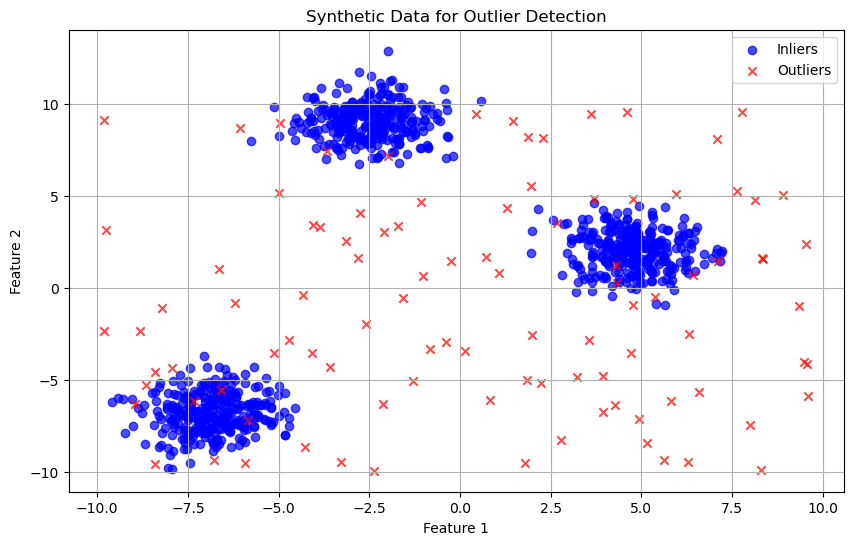

In [2]:
# Generate synthetic data
X, y = generate_data()
print(X.shape) 
print(y.shape)

# Plot the generated data
visualize_data(X, y)


Classification Report:
              precision    recall  f1-score   support

      Inlier       0.98      0.98      0.98       900
     Outlier       0.79      0.79      0.79       100

    accuracy                           0.96      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.96      0.96      0.96      1000

ROC AUC: 0.9573, Precision-Recall AUC: 0.8310


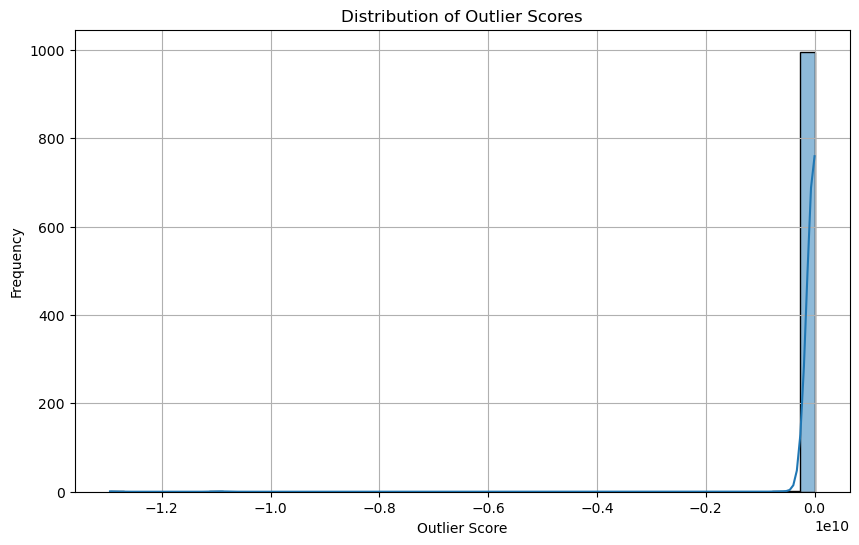

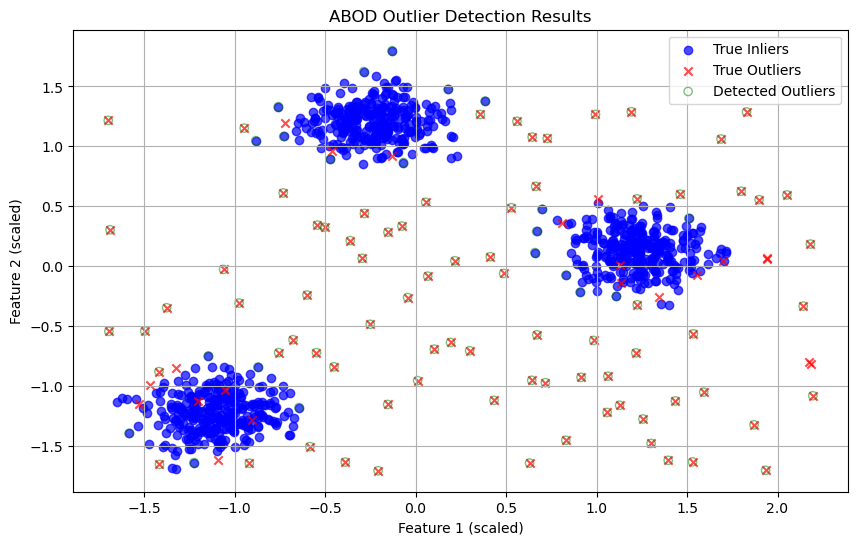

In [3]:
# Step 3: Apply ABOD algorithm and analyze the results
apply_abod(X, y, contamination=0.1)

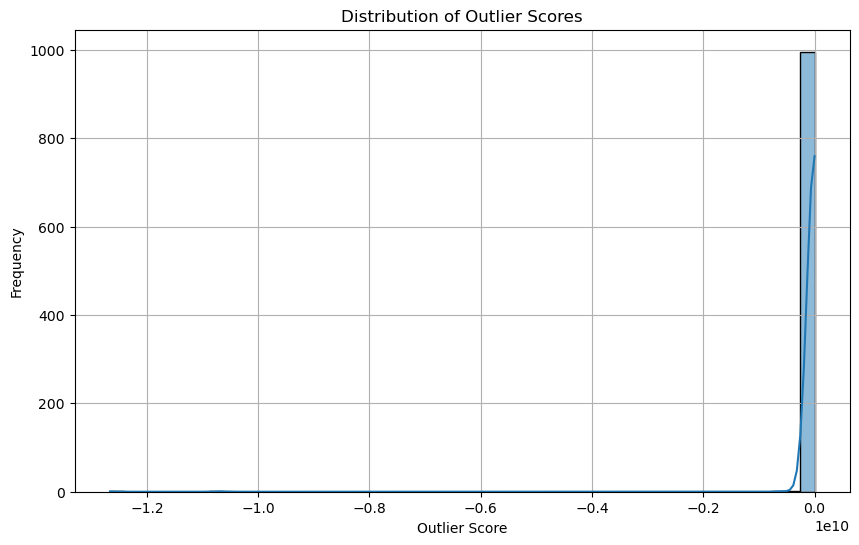

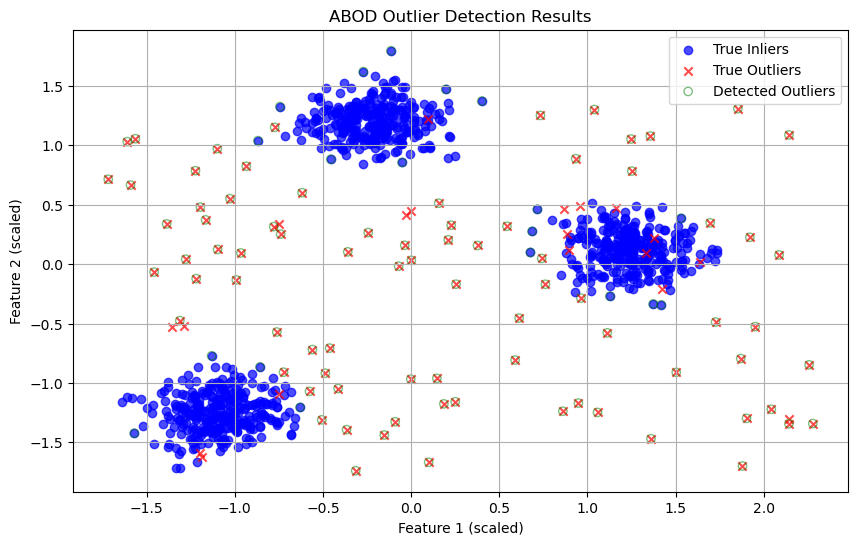

ROC AUC: 0.9661
Precision-Recall AUC: 0.8384319283732865
Classification Report:
               precision    recall  f1-score   support

      Inlier       0.98      0.98      0.98       900
     Outlier       0.81      0.81      0.81       100

    accuracy                           0.96      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.96      0.96      0.96      1000

Precision at Rank n: 0.81


In [8]:
# Generate synthetic data
X, y = generate_data(n_samples=1000, n_features=2, n_inliers=900, n_outliers=100)

# Apply ABOD with customized options
results = apply_abod_advanced(
    X, y,
    contamination=0.1,
    scale_data=True,
    scaler_type='standard',
    plot_scores=True,
    plot_outliers=True
)

# Accessing the results
print("ROC AUC:", results['roc_auc'])
print("Precision-Recall AUC:", results['pr_auc'])
print("Classification Report:\n", results['classification_report'])
print("Precision at Rank n:", results['precision_at_rank_n']

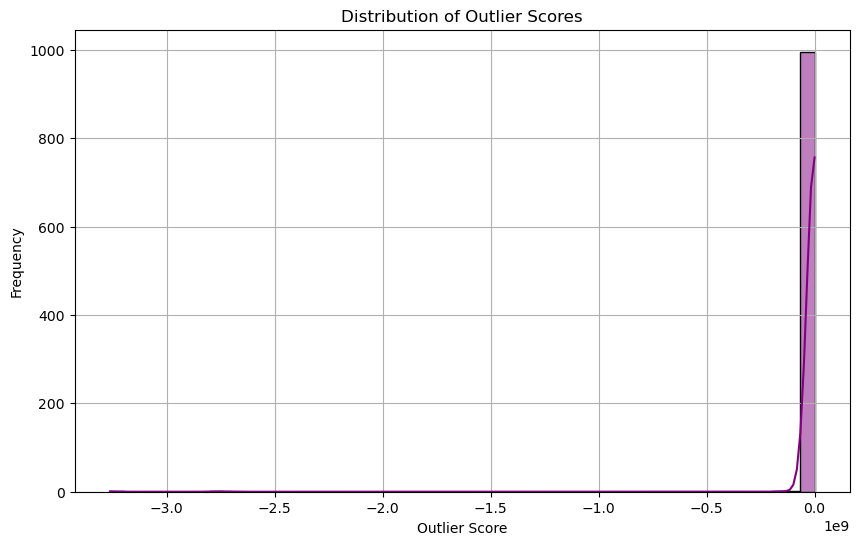

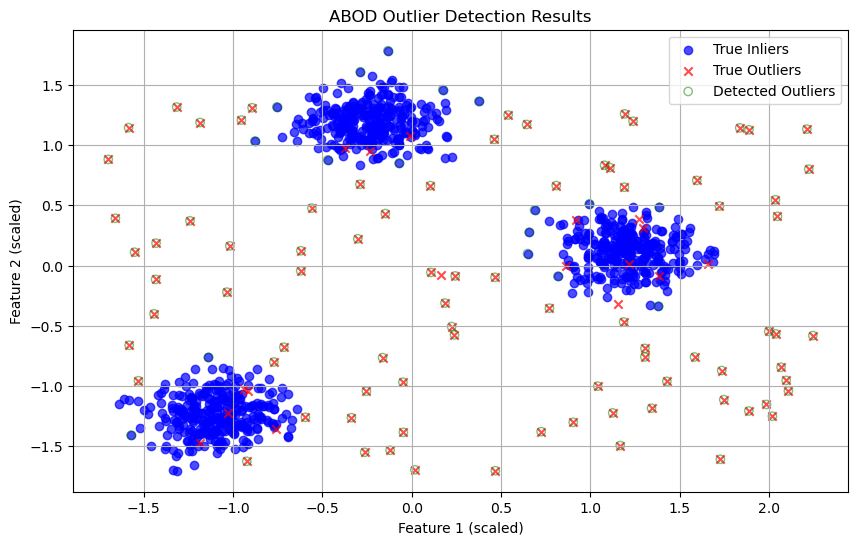

ROC AUC: 0.9459444444444445
Precision-Recall AUC: 0.8355484750384639
Classification Report:
               precision    recall  f1-score   support

      Inlier       0.98      0.98      0.98       900
     Outlier       0.83      0.83      0.83       100

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

Precision at Rank n: 0.83


In [9]:
# Step 1: Generate synthetic data
X, y = generate_data(n_samples=1000, n_features=2, n_inliers=900, n_outliers=100)

# Step 2: Apply ABOD with customized options
results = apply_abod_advanced(
    X, y,
    contamination=0.1,                   # Proportion of data expected to be outliers
    scale_data=True,                     # Whether to scale the data
    scaler_type='standard',              # Type of scaler to use ('standard' or 'minmax')
    plot_scores=True,                    # Whether to plot the distribution of outlier scores
    plot_outliers=True,                  # Whether to plot the detected outliers
    n=None,                              # Number of outliers for precision calculation (None uses actual number of outliers)
    abod_params={'n_neighbors': 10},     # Parameters for the ABOD model
    plot_params={'color': 'purple'}      # Parameters for plotting
)

# Step 3: Access and print the results
print("ROC AUC:", results['roc_auc'])
print("Precision-Recall AUC:", results['pr_auc'])
print("Classification Report:\n", results['classification_report'])
print("Precision at Rank n:", results['precision_at_rank_n'])

## Real-World Example

### Dataset Introduction

This section introduces a real-world dataset chosen for analysis with the ABOD algorithm. The dataset is described in terms of its features, size, and domain relevance.

### Preprocessing the Real-World Data

We preprocess the real-world dataset, ensuring it is suitable for analysis by handling missing values, scaling features, and performing any necessary transformations.

### Applying ABOD to Real-World Data

The ABOD algorithm is applied to the preprocessed dataset, and its performance is evaluated using the same metrics and techniques discussed earlier.

### Analyzing Results

We analyze the results, focusing on the insights gained from identifying anomalies and their implications for the dataset's domain.

In [47]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load ARFF file
data, meta = arff.loadarff('../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff')

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())
print(df.info())

    id       Age  Sex  ChestPainType  RestBloodPressure  SerumCholestoral  \
0  1.0  0.854167  1.0       1.000000           0.339623          0.447489   
1  2.0  0.791667  0.0       0.666667           0.198113          1.000000   
2  3.0  0.583333  1.0       0.333333           0.283019          0.308219   
3  4.0  0.729167  1.0       1.000000           0.320755          0.312785   
4  5.0  0.937500  0.0       0.333333           0.245283          0.326484   

   FastingBloodSugar  ResElectrocardiographic  MaxHeartRate  ExerciseInduced  \
0                0.0                      1.0      0.290076              0.0   
1                0.0                      1.0      0.679389              0.0   
2                0.0                      0.0      0.534351              0.0   
3                0.0                      0.0      0.259542              1.0   
4                0.0                      1.0      0.381679              1.0   

    Oldpeak  Slope  MajorVessels  Thal outlier  
0  0.38

In [54]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [73]:
# Convert the 'outlier' column to a binary format
# Assuming 'yes' indicates outliers (1) and 'no' indicates inliers (0)
label_encoder = LabelEncoder()
df['outlier'] = label_encoder.fit_transform(df['outlier'])

In [74]:
df['outlier'].value_counts()

outlier
0    150
1    120
Name: count, dtype: int64

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['id', 'outlier'])
y = df['outlier']

In [29]:
print(X.shape)
print(y.shape)

(270, 13)
(270,)


In [78]:
len(y[y==1])/len(y)

0.4444444444444444

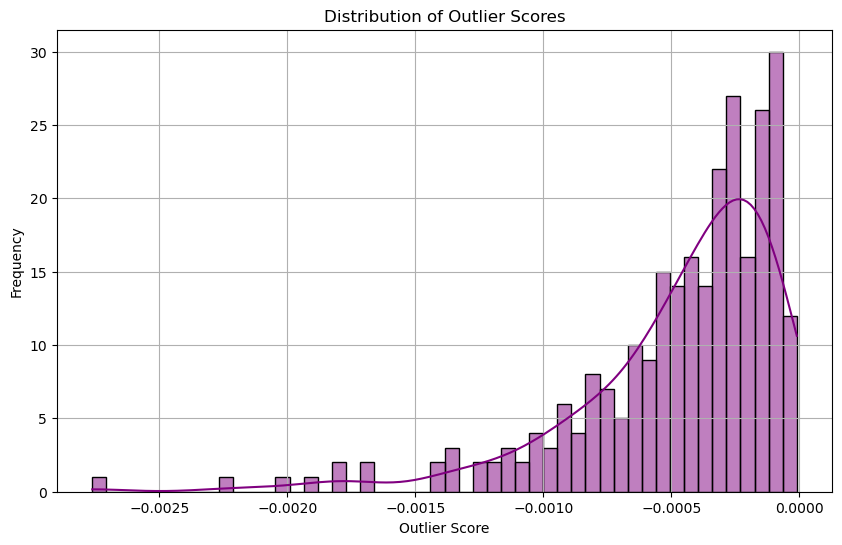

In [93]:
# Step 2: Apply ABOD with customized options
results = apply_abod_advanced(
    X, y,
    contamination=0.44,                     # Proportion of data expected to be outliers
    scale_data=True,                        # Whether to scale the data
    scaler_type='standard',                 # Type of scaler to use ('standard' or 'minmax')
    plot_scores=True,                       # Whether to plot the distribution of outlier scores
    plot_outliers=False,                    # Whether to plot the detected outliers
    n=120,                                  # Number of outliers for precision calculation (None uses actual number of outliers)
    abod_params={'n_neighbors': 100},       # Parameters for the ABOD model
    plot_params={'color': 'purple'}         # Parameters for plotting
)

In [94]:
print("The ROC:", results['roc_auc'])
print("Classification report", results['classification_report'])
print("Precision at n: ", results['precision_at_rank_n'])

The ROC: 0.6546666666666666
Classification report               precision    recall  f1-score   support

      Inlier       0.62      0.62      0.62       150
     Outlier       0.52      0.52      0.52       120

    accuracy                           0.57       270
   macro avg       0.57      0.57      0.57       270
weighted avg       0.57      0.57      0.57       270

Precision at n:  0.5166666666666667



Classification Report:
              precision    recall  f1-score   support

      Inlier       0.64      0.64      0.64       150
     Outlier       0.55      0.54      0.54       120

    accuracy                           0.60       270
   macro avg       0.59      0.59      0.59       270
weighted avg       0.60      0.60      0.60       270

Precision: 0.55
Recall: 0.54
F1 Score: 0.54


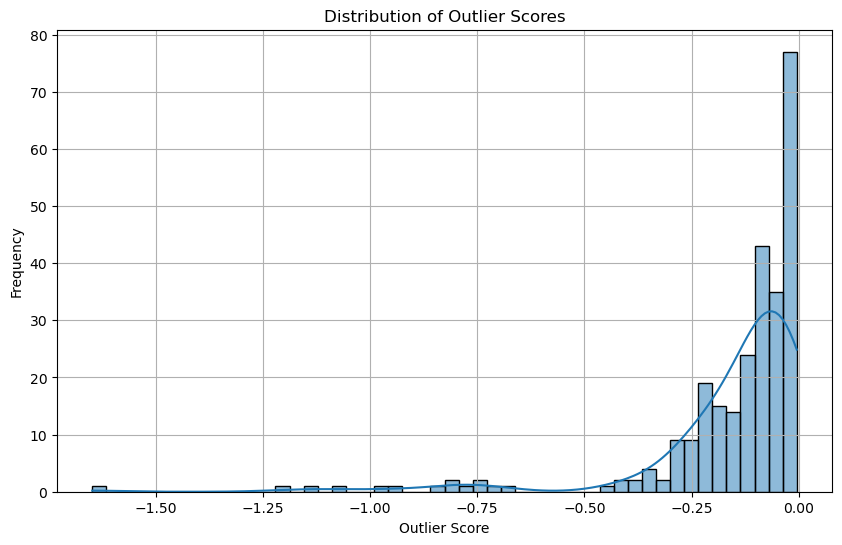

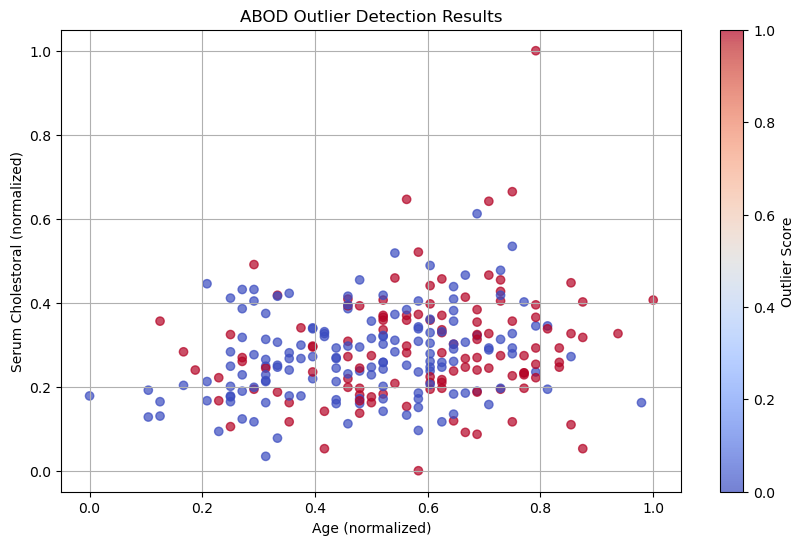

In [84]:
# Initialize ABOD model
abod = ABOD(contamination=0.44, n_neighbors=82)

# Fit the model to the data
abod.fit(X)

# Predict the outliers
y_pred = abod.labels_  # 0 for inliers, 1 for outliers
outlier_scores = abod.decision_scores_

# Evaluate the model performance
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Inlier', 'Outlier']))

precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores, bins=50, kde=True)
plt.title("Distribution of Outlier Scores")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Visualize detected outliers
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['SerumCholestoral'], c=y_pred, cmap='coolwarm', label='Detected Outliers', alpha=0.7)
plt.title("ABOD Outlier Detection Results")
plt.xlabel("Age (normalized)")
plt.ylabel("Serum Cholestoral (normalized)")
plt.colorbar(label='Outlier Score')
plt.grid(True)
plt.show()

In [85]:
import numpy as np

def precision_at_rank_n(y_true, y_scores, n=None):
    """
    Calculate precision at rank n for anomaly detection.

    Parameters
    ----------
    y_true : ndarray
        True binary labels for the dataset, where 1 indicates outliers and 0 indicates inliers.
    
    y_scores : ndarray
        Outlier scores for each sample, higher scores indicate higher likelihood of being an outlier.
    
    n : int, optional
        The number of top-ranked samples to consider for calculating precision. If None, it defaults to the number of actual outliers.
    
    Returns
    -------
    precision : float
        Precision at rank n.
    """
    if n is None:
        n = int(np.sum(y_true))  # Default to the number of actual outliers

    # Get indices of the top n scores
    top_n_indices = np.argsort(y_scores)[-n:]

    # Get the labels for the top n scores
    top_n_labels = y_true[top_n_indices]

    # Calculate precision at rank n
    precision = np.sum(top_n_labels) / n
    return precision

In [86]:
# Calculate precision at rank n
precision_n = precision_at_rank_n(y, outlier_scores)
print(f"Precision at rank n: {precision_n:.5f}")

Precision at rank n: 0.55000


## Testing ABOD on Multiple Datasets

### Overview of Datasets

We provide an overview of several datasets used to evaluate ABOD's performance across different domains and conditions.

### Batch Testing and Performance Evaluation

The ABOD algorithm is tested on each dataset, and performance metrics are calculated to compare its effectiveness across various scenarios.

### Summary of Results

A summary of the results is presented, highlighting key findings, patterns, and areas for further investigation.

## Conclusion

This notebook demonstrates the application of the **Angle-based Outlier Detector (ABOD)** algorithm across multiple contexts. Through theoretical exploration and practical implementation, we have showcased ABOD's strengths in detecting anomalies in both artificial and real-world datasets.

## References

### Academic Articles

1. **Kriegel, H.-P., Kröger, P., Schubert, E., & Zimek, A. (2008).** *Angle-Based Outlier Detection in High-dimensional Data*. In Proceedings of the 14th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 444-452). ACM.  
   [DOI:10.1145/1401890.1401946](https://dl.acm.org/doi/10.1145/1401890.1401946)  
   - This is the original paper introducing the ABOD algorithm, detailing the method's approach to identifying outliers in high-dimensional spaces using angular relationships.

2. **Zimek, A., Schubert, E., & Kriegel, H.-P. (2012).** *A survey on unsupervised outlier detection in high-dimensional numerical data*. Statistical Analysis and Data Mining: The ASA Data Science Journal, 5(5), 363-387.  
   [DOI:10.1002/sam.11161](https://onlinelibrary.wiley.com/doi/abs/10.1002/sam.11161)  
   - This survey paper explores various unsupervised outlier detection methods, with insights into high-dimensional challenges, including discussions on ABOD.

3. **Schubert, E., Zimek, A., & Kriegel, H.-P. (2012).** *Local Outlier Detection Reconsidered: A Generalized View on Locality with Applications to Spatial, Video, and Network Outlier Detection*. Data Mining and Knowledge Discovery, 28(1), 190-237.  
   [DOI:10.1007/s10618-012-0300-z](https://link.springer.com/article/10.1007/s10618-012-0300-z)  
   - This paper provides a generalized view on local outlier detection methods, offering insights into various applications and theoretical foundations.

4. **Zhang, K., Hutter, M., & Jin, H. (2009).** *A new local distance-based outlier detection approach for scattered real-world data*. In Pacific-Asia Conference on Knowledge Discovery and Data Mining (pp. 813-822). Springer.  
   [DOI:10.1007/978-3-642-01307-2_87](https://link.springer.com/chapter/10.1007/978-3-642-01307-2_87)  
   - This paper discusses local distance-based outlier detection, offering an alternative perspective that complements the angle-based approach of ABOD.

5. **Breunig, M. M., Kriegel, H.-P., Ng, R. T., & Sander, J. (2000).** *LOF: Identifying Density-Based Local Outliers*. In Proceedings of the 2000 ACM SIGMOD International Conference on Management of Data (pp. 93-104). ACM.  
   [DOI:10.1145/342009.335388](https://dl.acm.org/doi/10.1145/342009.335388)  
   - Although focused on the Local Outlier Factor (LOF) method, this paper provides valuable insights into density-based outlier detection, which is often contrasted with angle-based methods.

6. **Hodge, V. J., & Austin, J. (2004).** *A survey of outlier detection methodologies*. Artificial Intelligence Review, 22(2), 85-126.  
   [DOI:10.1023/B:AIRE.0000045502.10941.a9](https://link.springer.com/article/10.1023/B:AIRE.0000045502.10941.a9)  
   - A comprehensive survey of outlier detection methodologies, this paper provides context for understanding where ABOD fits within the larger landscape of outlier detection techniques.

### Books

1. **Aggarwal, C. C., & Sathe, S. (2017).** *Outlier Ensembles: An Introduction*. Springer.  
   [Springer Link](https://link.springer.com/book/10.1007/978-3-319-54765-7)  
   - This book introduces the concept of outlier ensembles, covering various techniques for combining multiple anomaly detection models to improve accuracy and robustness. It is a valuable resource for researchers and practitioners interested in ensemble methods for anomaly detection.

2. **Han, J., Kamber, M., & Pei, J. (2011).** *Data Mining: Concepts and Techniques (3rd ed.)*. Elsevier.  
   [Elsevier Link](https://shop.elsevier.com/books/data-mining-concepts-and-techniques/han/978-0-12-381479-1)  
   - This comprehensive book covers the fundamental concepts and techniques in data mining, including chapters on anomaly detection. It is widely used as a textbook for data mining courses and a reference for researchers and professionals.

3. **Aggarwal, C. C. (2013).** *Outlier Analysis*. Springer.  
   [ISBN:978-1-4614-6395-6](https://link.springer.com/book/10.1007/978-3-319-47578-3)  
   - This book provides comprehensive coverage of various outlier detection methods, including a section on angle-based techniques. It is a great resource for understanding the broader context of outlier analysis.

4. **Tan, P.-N., Steinbach, M., & Kumar, V. (2005).** *Introduction to Data Mining*. Pearson.  
   [ISBN:978-0321321367](https://www.pearson.com/us/higher-education/program/Tan-Introduction-to-Data-Mining-1st-Edition/PGM207437.html)  
   - This textbook provides a foundational understanding of data mining techniques, including sections on outlier detection.

### Online Documentation and Resources

1. **PyOD: A Python Toolbox for Scalable Outlier Detection (2019).**  
   [GitHub Repository](https://github.com/yzhao062/pyod)  
   - PyOD is a comprehensive Python library for outlier detection. The library implements the ABOD algorithm and provides documentation and examples for practical applications.

2. **PyOD Documentation**  
   [PyOD Documentation](https://pyod.readthedocs.io/en/latest/)  
   - The PyOD documentation provides practical examples and usage details for applying the ABOD algorithm and other outlier detection methods in Python.

3. **Wikipedia Article on Outlier Detection**  
   [Outlier Detection - Wikipedia](https://en.wikipedia.org/wiki/Anomaly_detection)  
   - This Wikipedia article gives an overview of anomaly detection techniques, including angle-based methods like ABOD.


### Additional Resources

- **Medium: Anomaly Detection Techniques: A Comprehensive Guide with Supervised and Unsupervised Learning**  
  [Medium](https://medium.com/@venujkvenk/anomaly-detection-techniques-a-comprehensive-guide-with-supervised-and-unsupervised-learning-67671cdc9680)  
  - This article provides a comprehensive guide on anomaly detection techniques, covering both supervised and unsupervised learning methods with practical examples.

- **Data Head Hunters: How to Use Python for Anomaly Detection in Data: Detailed Steps**  
  [Data Head Hunters](https://dataheadhunters.com/academy/how-to-use-python-for-anomaly-detection-in-data-detailed-steps/)  
  - This article provides a detailed guide on using Python for anomaly detection, covering the necessary steps and offering practical examples to implement various techniques.

- **Analytics Vidhya: An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library**
  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)  
  - A blog post exploring outlier detection techniques using PyOD, including the ABOD algorithm, with Python code examples and insights into practical applications.

- **Coursera: Anomaly Detection in Machine Learning**  
  [Coursera](https://www.coursera.org/articles/anomaly-detection-machine-learning)  
  - This article on Coursera provides an overview of anomaly detection in machine learning, discussing various techniques, their applications, and the importance of anomaly detection in different domains.

- **Analytics Vidhya: Learning Different Techniques of Anomaly Detection**  
  [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/01/learning-different-techniques-of-anomaly-detection/)  
  - This article explores various anomaly detection techniques, offering insights into different algorithms and practical tips for implementing these methods in real-world scenarios.